In [23]:
# Exercise 1

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("data/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data = data.drop(columns=["Name", "PassengerId", "Ticket"])

In [6]:
import numpy as np

# data["CabinLetter"] = np.nan

def cl_create(row):
    cabin = row["Cabin"]
    if cabin and type(cabin) == str:
        return cabin[0]
    return np.nan

data["Deck"] = data.apply(lambda x: cl_create(x), axis=1)

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,NaN
887,1,1,female,19.0,0,0,30.0000,B42,S,B
888,0,3,female,NaN,1,2,23.4500,NaN,S,NaN
889,1,1,male,26.0,0,0,30.0000,C148,C,C


In [7]:
data["Survived"] = data["Survived"].astype("category")
data["Deck"] = data["Deck"].astype("category")
data["Pclass"] = data["Pclass"].astype("category")

In [8]:
data["Pclass"] = data["Pclass"].fillna(data["Pclass"].mode()[0])
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["SibSp"] = data["SibSp"].fillna(data["SibSp"].mean())
data["Parch"] = data["Parch"].fillna(data["Parch"].mean())
data["Fare"] = data["Fare"].fillna(data["Fare"].mean())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
data["Deck"] = data["Deck"].fillna(data["Deck"].mode()[0])

In [9]:
data = data.drop(columns=["Cabin"])

data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.000000,1,0,7.2500,S,C
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,C
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,C
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,C
887,1,1,female,19.000000,0,0,30.0000,S,B
888,0,3,female,29.699118,1,2,23.4500,S,C
889,1,1,male,26.000000,0,0,30.0000,C,C


In [10]:
data.to_csv("data/train_v2.csv")
data.to_json("data/train_v2.json", orient="records")

In [11]:
# Exercise 2

In [12]:
print(data["Survived"].mode()[0])
print(data["Pclass"].mode()[0])
print(data["Sex"].mode()[0])
print(data["Age"].median())
print(data["SibSp"].median())
print(data["Parch"].median())
print(data["Fare"].median())

0
3
male
29.69911764705882
0.0
0.0
14.4542


In [13]:
print("Dead!")
dead = data[data["Survived"]==0]
print(dead["Survived"].mode()[0])
print(dead["Pclass"].mode()[0])
print(dead["Sex"].mode()[0])
print(dead["Age"].median())
print(dead["SibSp"].median())
print(dead["Parch"].median())
print(dead["Fare"].median())

Dead!
0
3
male
29.69911764705882
0.0
0.0
10.5


In [14]:
print("Alive!")
alive = data[data["Survived"]==1]
print(alive["Survived"].mode()[0])
print(alive["Pclass"].mode()[0])
print(alive["Sex"].mode()[0])
print(alive["Age"].median())
print(alive["SibSp"].median())
print(alive["Parch"].median())
print(alive["Fare"].median())

Alive!
1
1
female
29.69911764705882
0.0
0.0
26.0


Text(0.5, 0, 'sex')

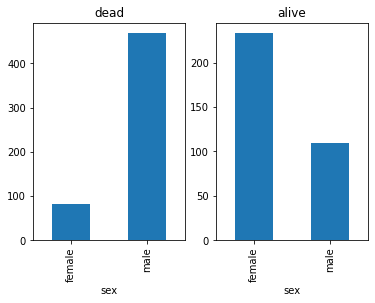

In [27]:
from matplotlib import pyplot as plt

dead = data[data['Survived']==0].groupby('Sex')['Survived'].count()
alive = data[data['Survived']==1].groupby('Sex')['Survived'].count()
fig = plt.figure()

p1 = fig.add_subplot(121)
plt.title('dead')
dead.plot(kind='bar', ax=p1)
p1.xaxis.set_label_text('sex')

p2 = fig.add_subplot(122)
plt.title('alive')
alive.plot(kind='bar', ax=p2)
p2.xaxis.set_label_text('sex')

Text(0.5, 0, 'deck')

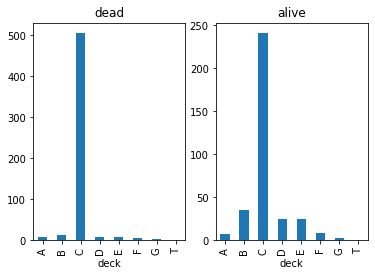

In [31]:
dead = data[data['Survived']==0].groupby('Deck')['Survived'].count()
alive = data[data['Survived']==1].groupby('Deck')['Survived'].count()
fig = plt.figure()

p1 = fig.add_subplot(121)
plt.title('dead')
dead.plot(kind='bar', ax=p1)
p1.xaxis.set_label_text('deck')

p2 = fig.add_subplot(122)
plt.title('alive')
alive.plot(kind='bar', ax=p2)
p2.xaxis.set_label_text('deck')

Text(0.5, 0, 'deck')

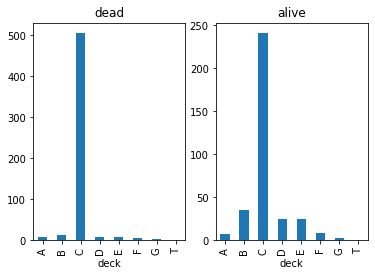

In [34]:
dead = data[data['Survived']==0].groupby('Deck')['Survived'].count()
alive = data[data['Survived']==1].groupby('Deck')['Survived'].count()
fig = plt.figure()

p1 = fig.add_subplot(121)
plt.title('dead')
dead.plot(kind='bar', ax=p1)
p1.xaxis.set_label_text('deck')

p2 = fig.add_subplot(122)
plt.title('alive')
alive.plot(kind='bar', ax=p2)
p2.xaxis.set_label_text('deck')

Text(0, 0.5, 'sex')

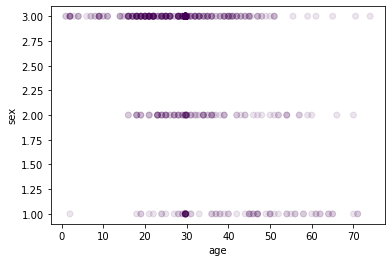

In [49]:
dead = data[data['Survived']==0]
plt.scatter(dead["Age"], dead["Pclass"], c=dead["Survived"], alpha=0.1)
plt.xlabel('age')
plt.ylabel('sex')

Text(0, 0.5, 'sex')

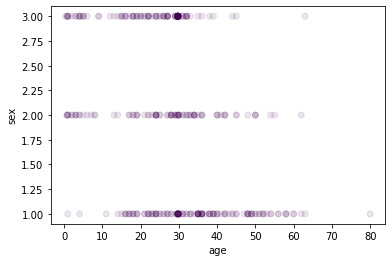

In [50]:
alive = data[data['Survived']==1]
plt.scatter(alive["Age"], alive["Pclass"], c=alive["Survived"], alpha=0.1)
plt.xlabel('age')
plt.ylabel('sex')

Imputing makes data management easier, as all the plots will then have the same amount of data units. However, it might skew the results somewhat.

In [72]:
pos = open("data/pos.txt","r").read()
neg = open("data/neg.txt","r").read()

In [73]:
from collections import Counter

In [86]:
pos_split = pos.split()
c = Counter(pos_split)

c.most_common(10)

[('use', 11263),
 ('car', 5934),
 ('work', 5765),
 ('product', 4292),
 ('great', 4156),
 ('just', 4096),
 ('like', 3883),
 ('good', 3828),
 ('time', 3005),
 ('need', 2982)]

In [87]:
neg_split = neg.split()
c = Counter(neg_split)

c.most_common(10)

[('use', 891),
 ('product', 592),
 ('work', 561),
 ('car', 503),
 ('just', 444),
 ('like', 388),
 ('good', 351),
 ('light', 329),
 ('time', 321),
 ('tri', 298)]

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

pos_V = TfidfVectorizer()
pos_vectors = pos_V.fit_transform(pos_split)

pos_w = np.asarray(pos_vectors.mean(axis=0)).ravel().tolist()
pos_w_df = pd.DataFrame({'term': pos_V.get_feature_names(), 'weight': pos_w})
pos_by_w = pos_w_df.sort_values('weight',ascending=False)
pos_by_w['term'].values.tolist()[:10]


['use',
 'car',
 'work',
 'product',
 'great',
 'just',
 'like',
 'good',
 'time',
 'need']

In [89]:
neg_V = TfidfVectorizer()
neg_vectors = neg_V.fit_transform(neg_split)

neg_w = np.asarray(neg_vectors.mean(axis=0)).ravel().tolist()
neg_w_df = pd.DataFrame({'term': neg_V.get_feature_names(), 'weight': neg_w})
neg_by_w = neg_w_df.sort_values('weight',ascending=False)
neg_by_w['term'].values.tolist()[:10]

['use',
 'product',
 'work',
 'car',
 'just',
 'like',
 'good',
 'light',
 'time',
 'tri']

There is some difference between the most common words and the words with the highest TF/IDF scores, but not much. TF/IDF was probably not the best suited for this task, as the most common words between both negative and positive reviews is very similar. 

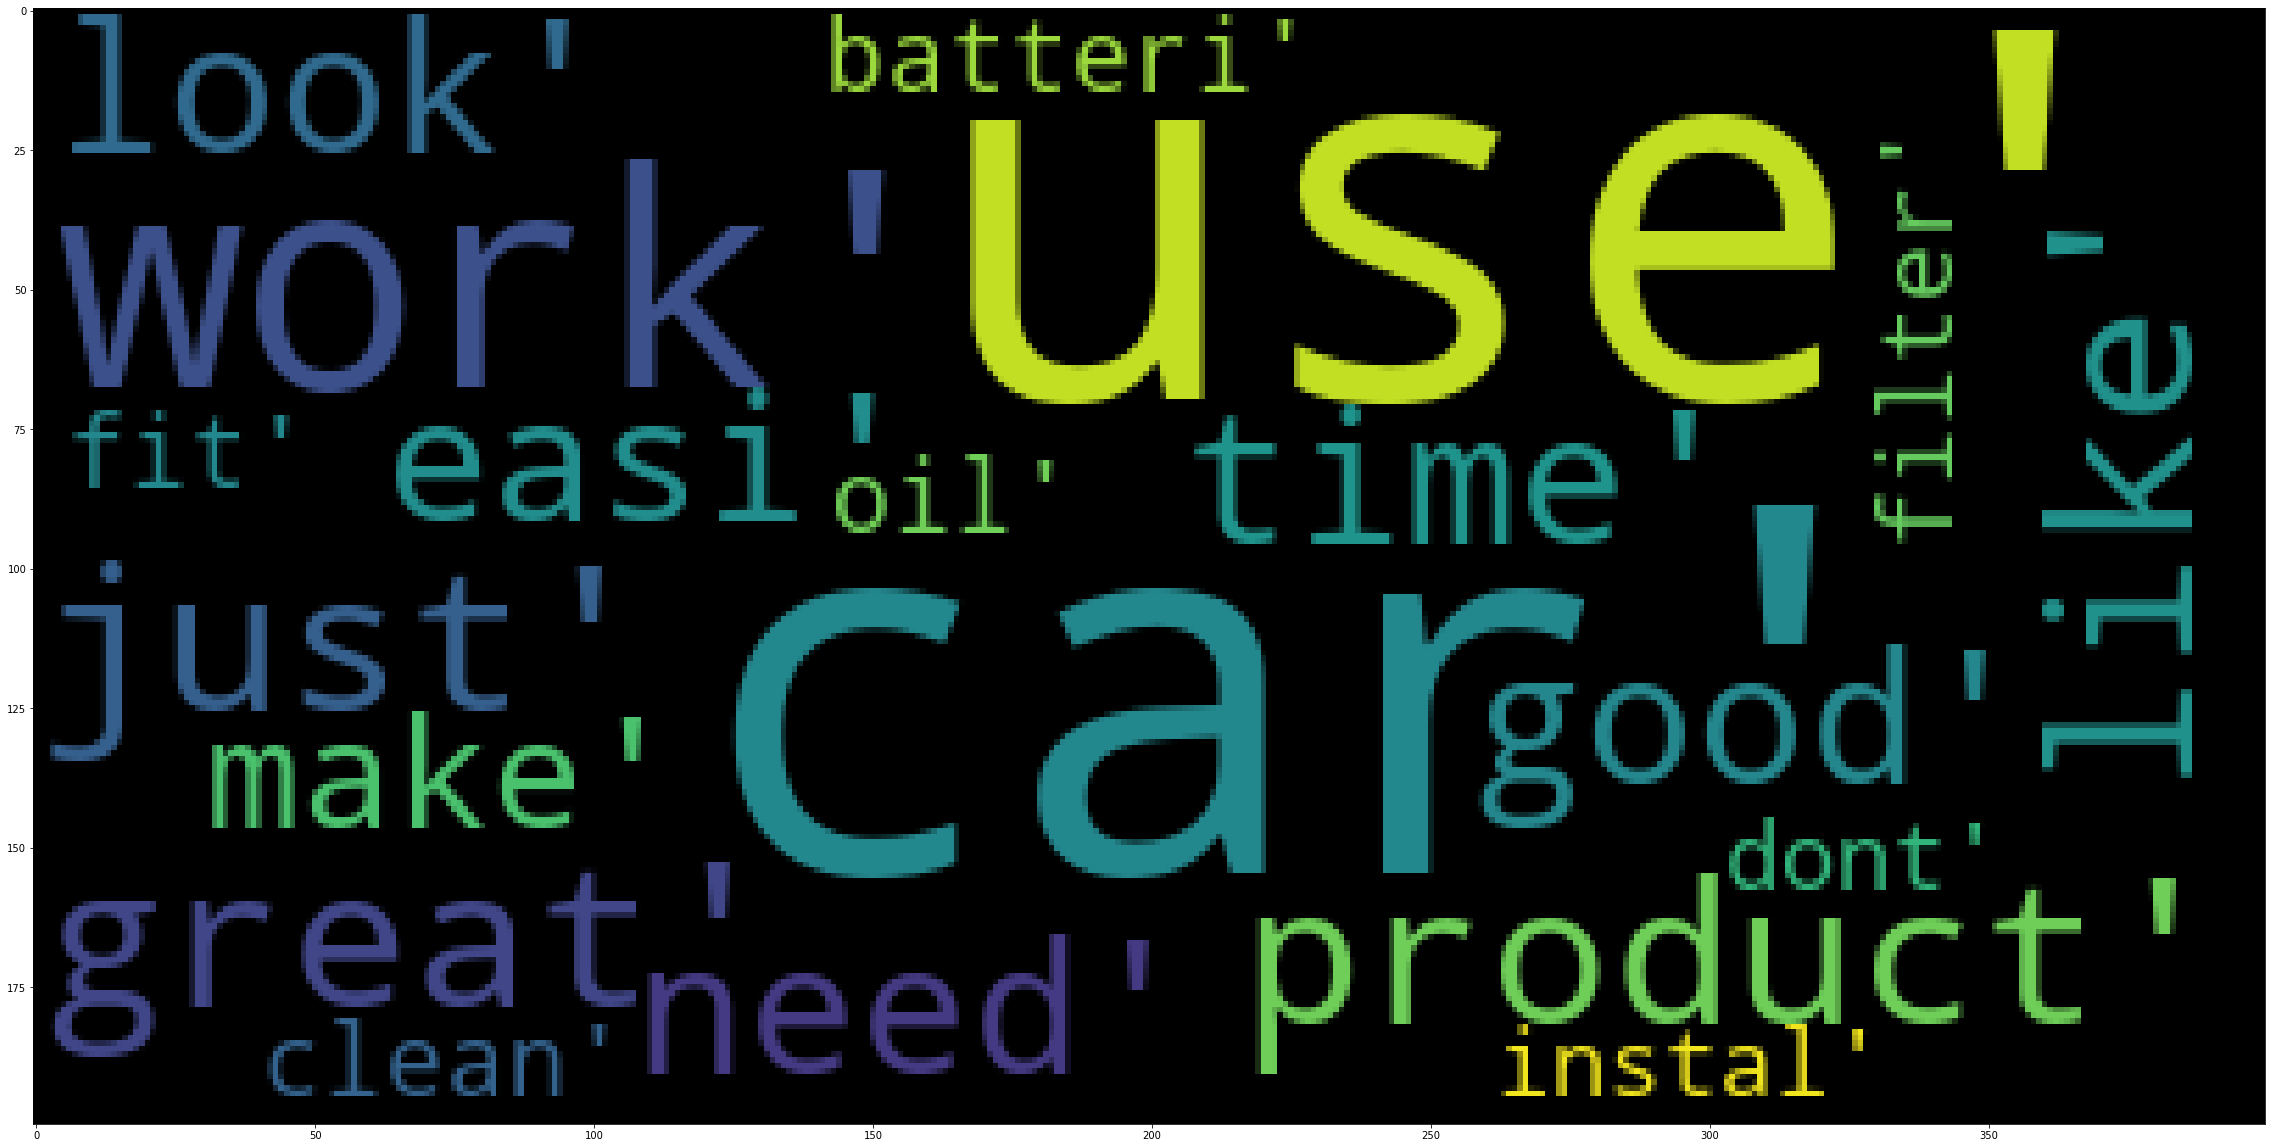

In [94]:
from wordcloud import WordCloud

text = pos_by_w.term.values[:20]
wc = WordCloud().generate(str(text))
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wc)
plt.show()

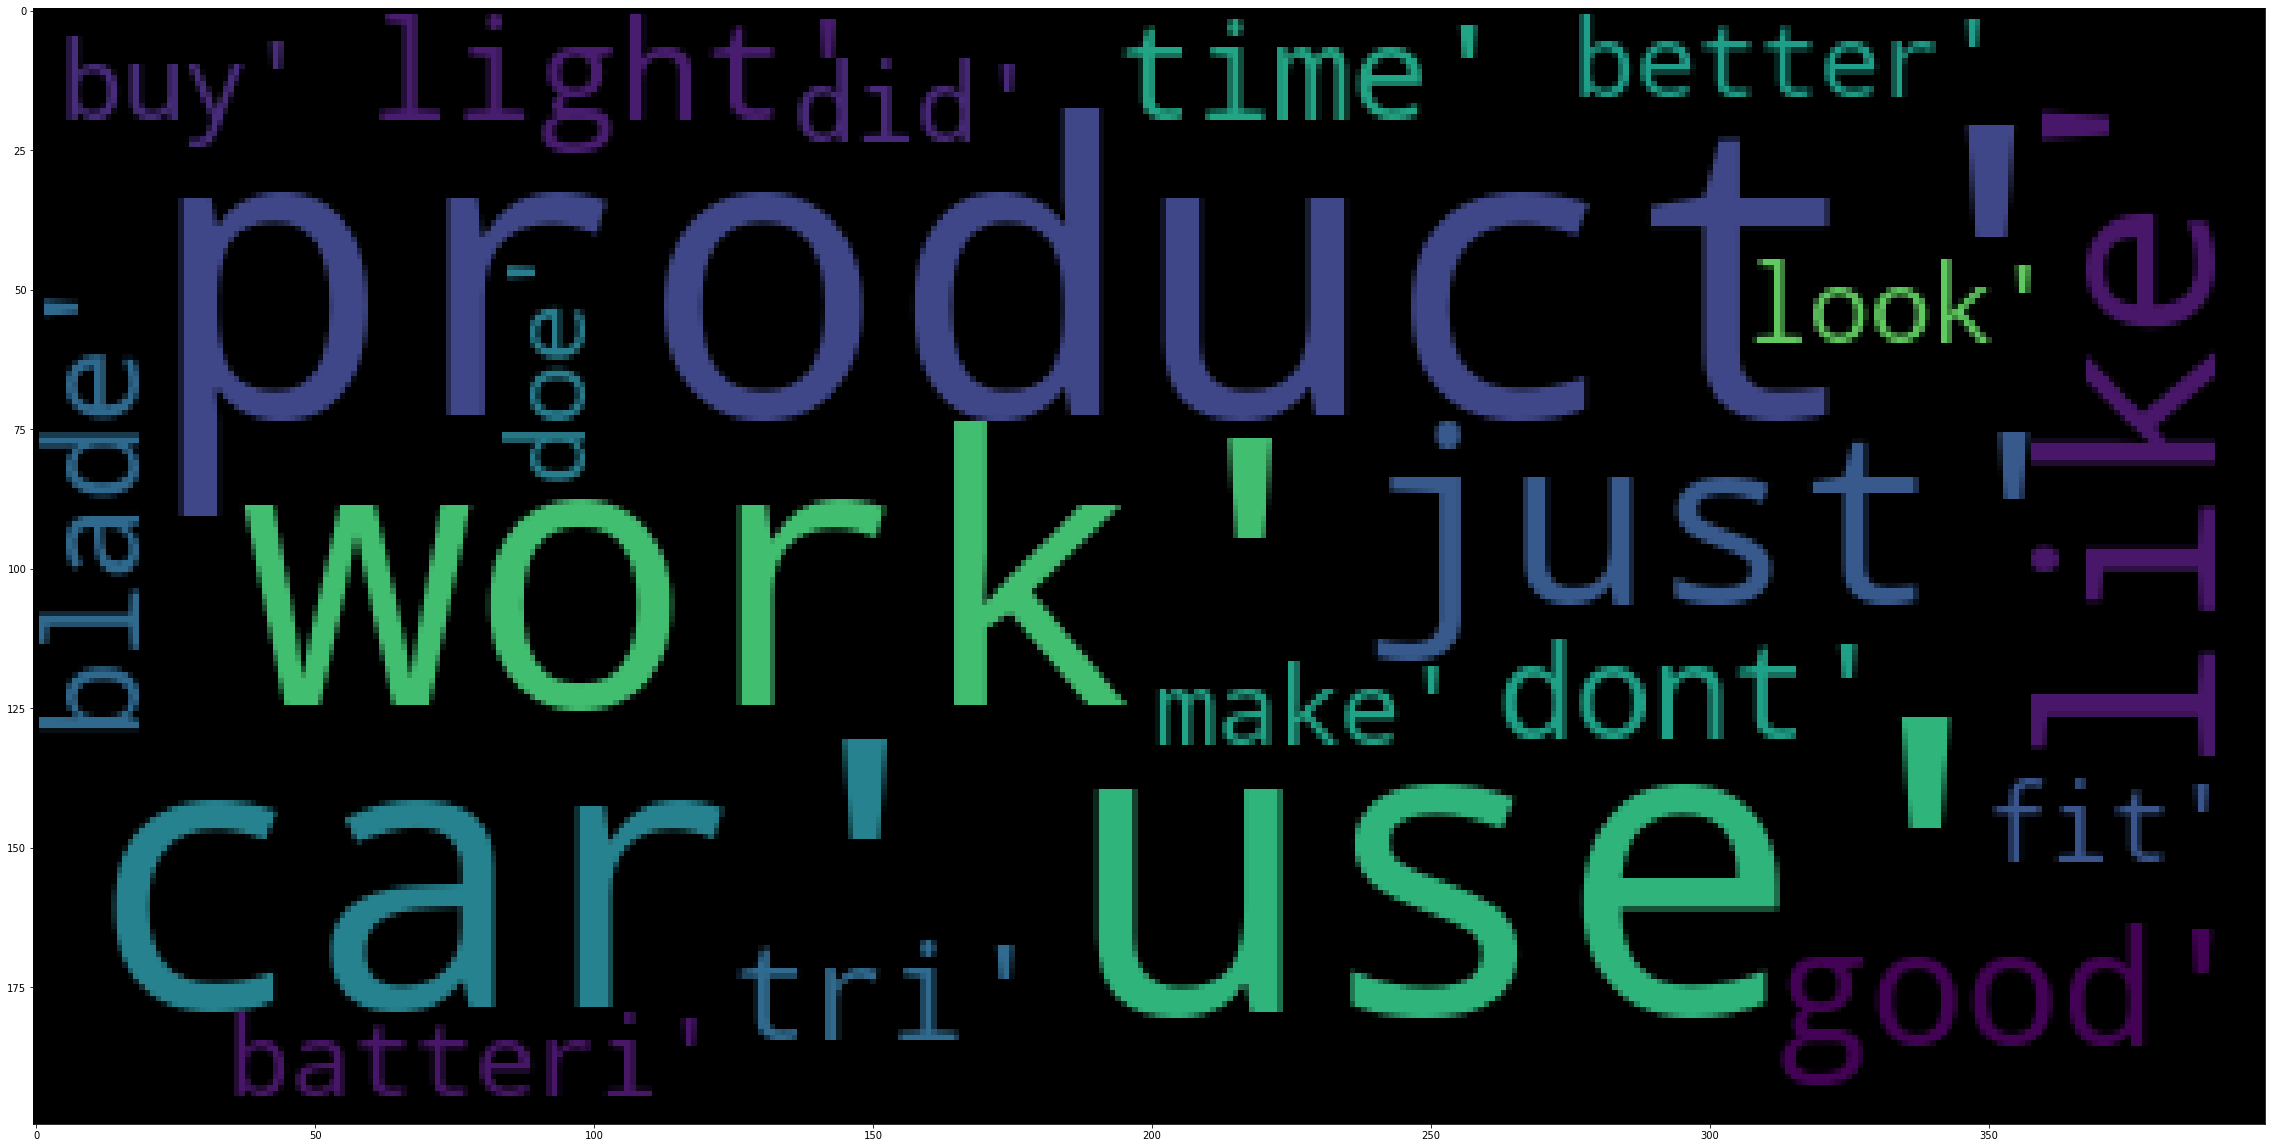

In [93]:
from wordcloud import WordCloud

text = neg_by_w.term.values[:20]
wc = WordCloud().generate(str(text))
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wc)
plt.show()